In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define Image Size

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

# Load DataSet

In [3]:
Train = tf.keras.preprocessing.image_dataset_from_directory(
   r"C:\Users\Lenovo\Downloads\archive (6)\PLD_3_Classes_256\Training",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Test = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\Lenovo\Downloads\archive (6)\PLD_3_Classes_256\Testing',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Validation = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\Lenovo\Downloads\archive (6)\PLD_3_Classes_256\Validation',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3251 files belonging to 3 classes.
Found 405 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


In [4]:
class_names = Train.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [5]:
len(Train)

102

# Sample Data

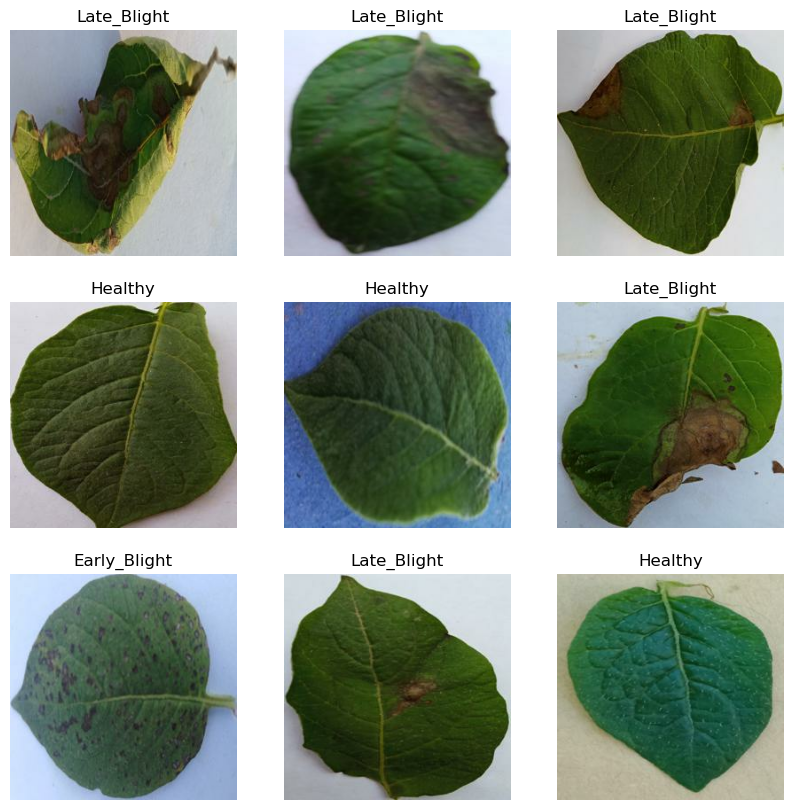

In [6]:
# plot Visualize 
plt.figure(figsize=(10,10))
for image, label in Test.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(Train.class_names[label[i]])
        plt.axis("off");
        

# Build The Model

In [11]:
resize_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [12]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [13]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model.build(input_shape=input_shape)



In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [15]:
# Compile the Model  
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

In [17]:
# training the model
EPOCHS = 25
history = model.fit(
                    Train,
                    validation_data=Validation,
                    epochs =EPOCHS,
                    batch_size = 32,
                    verbose = 1)

Epoch 1/25
102/102 [==============================] - 158s 2s/step - loss: 0.0954 - accuracy: 0.9671 - val_loss: 0.1186 - val_accuracy: 0.9591
Epoch 2/25
102/102 [==============================] - 155s 2s/step - loss: 0.1080 - accuracy: 0.9628 - val_loss: 0.1110 - val_accuracy: 0.9591
Epoch 3/25
102/102 [==============================] - 153s 2s/step - loss: 0.0921 - accuracy: 0.9699 - val_loss: 0.1483 - val_accuracy: 0.9351
Epoch 4/25
102/102 [==============================] - 758s 7s/step - loss: 0.0779 - accuracy: 0.9726 - val_loss: 0.1081 - val_accuracy: 0.9736
Epoch 5/25
102/102 [==============================] - 179s 2s/step - loss: 0.0914 - accuracy: 0.9692 - val_loss: 0.0970 - val_accuracy: 0.9712
Epoch 6/25
102/102 [==============================] - 168s 2s/step - loss: 0.0792 - accuracy: 0.9763 - val_loss: 0.1090 - val_accuracy: 0.9663
Epoch 7/25
102/102 [==============================] - 156s 2s/step - loss: 0.0798 - accuracy: 0.9760 - val_loss: 0.1009 - val_accuracy: 0.9688

# Model Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])



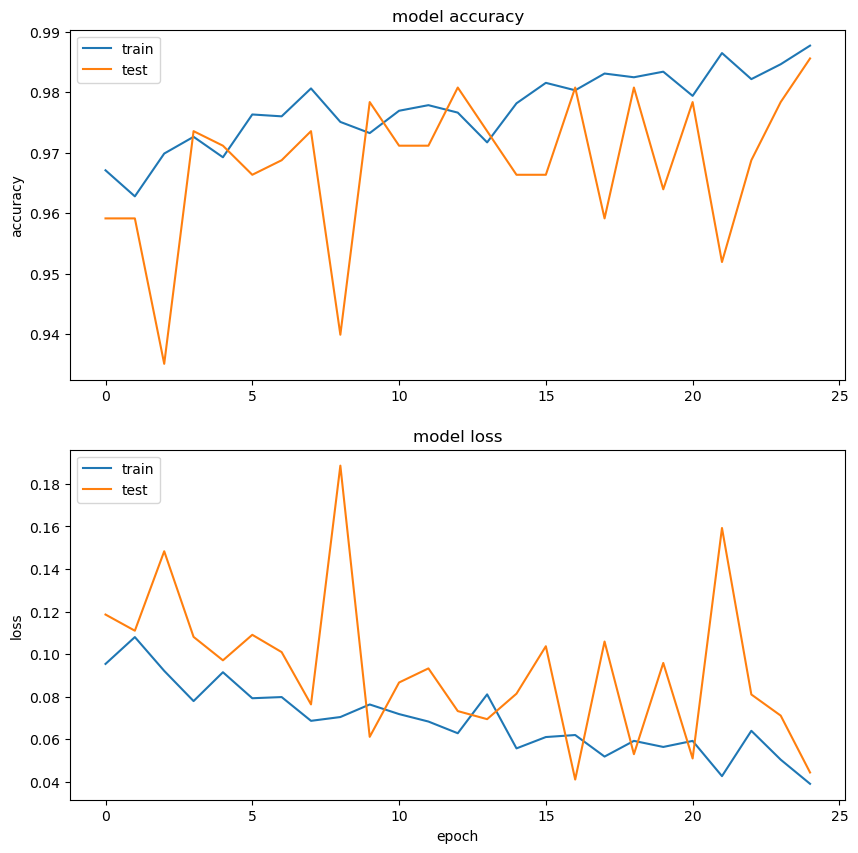

In [84]:
# list all data in history
print(history.history.keys())
print("")
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# evalute model
model.evaluate(Test)

13/13 [==============================] - 5s 356ms/step - loss: 0.0509 - accuracy: 0.9778


[0.05085908994078636, 0.9777777791023254]

In [20]:
# To Color The Output
from termcolor import colored

The Image Title :  Healthy
1/1 [==============================] - 0s 397ms/step
Model Predicted label :  Healthy


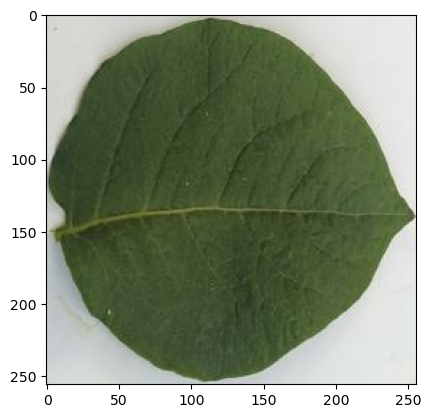

In [85]:
for image_batch,label_batch in Test.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("The Image Title : ",class_names[label_batch[0].numpy()])
    prediction = model.predict(image_batch)
    print("Model Predicted label : ",class_names[np.argmax(prediction[0])])